<a href="https://colab.research.google.com/github/Niko55/Project_Course_Term6/blob/master/Epsilon_Greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JKCooper2/gym-bandits

Cloning into 'gym-bandits'...
remote: Enumerating objects: 73, done.
remote: Total 73 (delta 0), reused 0 (delta 0), pack-reused 73
Unpacking objects: 100% (73/73), done.


In [2]:
cd gym-bandits

/content/gym-bandits


In [3]:
pip install .

Processing /content/gym-bandits
  Created wheel for gym-bandits: filename=gym_bandits-0.0.2-cp36-none-any.whl size=5180 sha256=6ff302a2e2a1ad3d421180120742ce09f93ca0c2eaed44df6e07f856b9d2876b
  Stored in directory: /root/.cache/pip/wheels/3a/f5/8a/043c9375d0a49bf4a5d102e93e5868a54ddaaf6508d88e4edc
Successfully built gym-bandits


In [0]:
import gym_bandits
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
env = gym.make("BanditTenArmedGaussian-v0")

In [0]:
## Creating datasets randomly
df = pd.DataFrame()
df['Headline_0'] = np.random.randint(0,2,100000)
df['Headline_1'] = np.random.randint(0,2,100000)
df['Headline_2'] = np.random.randint(0,2,100000)
df['Headline_3'] = np.random.randint(0,2,100000)
df['Headline_4'] = np.random.randint(0,2,100000)

In [6]:
df.head(10)

,Headline_0,Headline_1,Headline_2,Headline_3,Headline_4
0,1,1,1,0,1
1,1,1,0,1,1
2,0,0,1,1,0
3,1,1,1,1,0
4,1,0,1,0,1
5,0,1,0,1,0
6,1,1,1,0,0
7,1,0,1,0,0
8,1,0,0,0,1
9,1,0,1,0,1


In [0]:
# number of banners
num_banner = 5

# number of iterations
no_of_iterations = 100000

# list for storing banners which are selected
banner_selected = []

# count number of times the banner was selected
count = np.zeros(num_banner)

# Q value of the banner
Q = np.zeros(num_banner)

# sum of rewards obtained by the banner
sum_rewards = np.zeros(num_banner)

In [0]:
def epsilon_greedy(epsilon):
    
    random_value = np.random.random()
    choose_random = random_value < epsilon
    
    if choose_random:
        action =  np.random.choice(num_banner)
    else:
        action = np.argmax(Q)
    
    return action

In [0]:
for i in range(no_of_iterations):
    
    # select the banner using epsilon greedy policy
    banner = epsilon_greedy(0.5)
        
    # get the reward
    reward = df.values[i, banner]
    
    # update the selected banner count
    count[banner] += 1
    
    # sum the rewards obtained by that banner
    sum_rewards[banner]+=reward
    
    # calculate the Q value of the banner
    Q[banner] = sum_rewards[banner]/count[banner]
    
    banner_selected.append(banner)

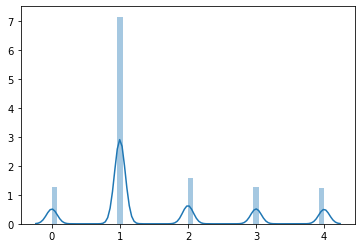

In [10]:
sns.distplot(banner_selected)